<h2>Word Cloud Model</h2>

<h4>Importando as bibliotecas<h4>

In [1]:
import matplotlib.pyplot as plt

In [2]:
from matplotlib.colors import ListedColormap

In [3]:
import nltk

In [4]:
from nltk.corpus import PlaintextCorpusReader

In [5]:
from nltk.corpus import stopwords

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #gerador de cores com base em img

In [7]:
import pandas as pd

In [8]:
from collections import Counter #coleções

In [9]:
import re #expressões regulares

In [10]:
from unicodedata import normalize #para remoção de acentos

In [11]:
from nltk import stem#stemmer
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\f7098849\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [12]:
from nltk.util import bigrams, trigrams, ngrams
import random

<h4>Importando o arquivo de dados</h4>

In [13]:
df = pd.read_excel('L:\Interna\Informações Gerencias\Projetos e Pesquisas\Machine Learning\cods\word_cloud\Post_Its_vivencia.xlsx', sheet_name='dados')

In [14]:
df.tail()

,Registro,Rótulo
280,É necessario conhecer bem o mercado e as soluç...,Insights
281,Negociação com a BBTS é dificil .,Insights
282,O processo de orçamento (Pfix) está descansado...,Insights
283,Indefinições GTI ao gestor de itten de TI (PBM...,Insights
284,Criar Banco de Benefícios e indicadores de TI.,Insights


Resumindo os dados do arquivo

In [15]:
df['Rótulo'].value_counts()

Insights    150
Sonhos      135
Name: Rótulo, dtype: int64

In [16]:
Counter(df['Rótulo'])

Counter({'Sonhos': 135, 'Insights': 150})

In [17]:
sonhos = 0
insights = 0
for x in range(0,len(df['Rótulo'])):
    if df['Rótulo'][x]=='Sonhos':
        sonhos +=1
    else:
        insights+=1

In [18]:
print('Sonhos: %d Insights: %d' % (sonhos, insights))

Sonhos: 135 Insights: 150


<Figure size 576x360 with 0 Axes>

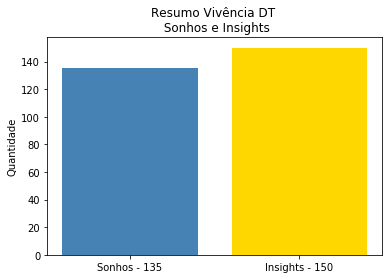

<Figure size 576x360 with 0 Axes>

In [19]:
%matplotlib inline
rotulos = ['Sonhos - 135', 'Insights - 150']
valores = [sonhos, insights]
cores = ['SteelBlue', 'Gold']
plt.bar(rotulos, valores, color=cores)
plt.title('Resumo Vivência DT \n Sonhos e Insights')
plt.ylabel('Quantidade')
#plt.show()
plt.savefig('C:/Developer/img_ml/vivenciaDT.png')#, transparent = True)
plt.figure(figsize=(8,5))

<h5>Stopwords<h5>

In [32]:
stop = pd.read_excel('L:\Interna\Informações Gerencias\Projetos e Pesquisas\Machine Learning\Stopwords\stopwords2.xlsx')

In [33]:
stop.tail()

,stopwords
555,é
556,éramos
557,és
558,último
559,o


In [34]:
#transformar as stopwords em lista
stopword_list = []
for x in range(0,len(stop['stopwords'])):
    #print(stop['stopwords'][x])
    stopword_list.append(stop['stopwords'][x])

In [35]:
len(stopword_list)

560

In [36]:
print(stopword_list[0:200])

['acerca', 'adeus', 'agora', 'ainda', 'alem', 'algmas', 'algo', 'algumas', 'alguns', 'ali', 'além', 'ambas', 'ambos', 'ano', 'anos', 'antes', 'ao', 'aonde', 'aos', 'apenas', 'apoio', 'apontar', 'apos', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'as', 'assim', 'através', 'atrás', 'até', 'aí', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cada', 'caminho', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'com', 'como', 'comprido', 'conhecido', 'conselho', 'contra', 'contudo', 'corrente', 'cuja', 'cujas', 'cujo', 'cujos', 'custa', 'cá', 'da', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'desligado', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'deverá', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'direita', 'dispoe', 'dispoem', 'diver

In [37]:
#removendo os acentos das stopwords
stopword_list_sem_acentos=[]
for x in range(0,len(stopword_list)):
    sem_acento = normalize('NFKD', stopword_list[x]).encode('ASCII', 'ignore').decode('ASCII')
    #sem_acento = re.sub('[\W]', '', stopword_list[x])
    stopword_list_sem_acentos.append(sem_acento)

In [38]:
print(stopword_list_sem_acentos[0:200])

['acerca', 'adeus', 'agora', 'ainda', 'alem', 'algmas', 'algo', 'algumas', 'alguns', 'ali', 'alem', 'ambas', 'ambos', 'ano', 'anos', 'antes', 'ao', 'aonde', 'aos', 'apenas', 'apoio', 'apontar', 'apos', 'apos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'as', 'assim', 'atraves', 'atras', 'ate', 'ai', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cada', 'caminho', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'com', 'como', 'comprido', 'conhecido', 'conselho', 'contra', 'contudo', 'corrente', 'cuja', 'cujas', 'cujo', 'cujos', 'custa', 'ca', 'da', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'desligado', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devera', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'direita', 'dispoe', 'dispoem', 'diver

<h4>Tratamento do campo texto desejado</h4>

In [39]:
arquivo_texto = open('L:/Interna/Informações Gerencias/Projetos e Pesquisas/Machine Learning/cods/word_cloud/arquivo_texto.txt', 'w')

In [41]:
#transformando o xls em txt
len(df['Registro'])#285

df['Registro'] = df['Registro'].str.lower()#transformando em minúsculo

for x in range(0,len(df['Registro'])):
    #print(df['Descrição'][x])
    arquivo_texto.writelines(df['Registro'][x])#escrevendo no arquivo, linha a linha
    #arquivo_texto.write('\n')

In [42]:
arquivo_texto.close()#fechar o arquivo

In [43]:
#abrir em modo leitura
manipulador_texto = open('L:/Interna/Informações Gerencias/Projetos e Pesquisas/Machine Learning/cods/word_cloud/arquivo_texto.txt', 'r')

In [44]:
texto_base = manipulador_texto.read()
texto_final = texto_base

In [45]:
type(texto_final)

str

In [46]:
print(texto_final)

melhor planejamento e contratações que reflitam as necessidades do banco.mais comprometimento dos intervenientes.uniformização das informações necessarias ao preenchimento dos documentos e dos procedimentos.automatização do processo.rapidez.unicidade de conceitos (software?).fluxo sem entraves .bb-bom e barato.que atenda plenamente a necessidade do banco.com cláusulas do contrato que resguardem o banco do brasil.rapidez e simplicidade aliadas a segurança jurídica.que tenha a inclusão de documentos pelo fornecedor.que tenha um painel que avise dos status dos novos e antigos .que filtre os fornecedores que não se enquadrão para a contratação.equipe planejamento com várias áreas (dod).etapas cfe solução contratada.clareza do "dono".ferramenta adequada.que seja transparente o banco do brasil e a sociedade.que tenha uma avaliação prévia de fornecedores ( usuários, mercado, banco do brasil).que tenha os ganhos gerados para o banco do brasil.sem burocracia ( por mera burocracia ).descomplicad

<h4>Criando a nuvem de TODO O TEXTO</h4>

In [32]:
#mapa de cores, opcional
#mapa_cores = ListedColormap(['orange', 'green', 'red', 'blue', 'black'])

In [48]:
nuvem = WordCloud(max_words=100,
                 background_color='white',
                 #colormap=mapa_cores,
                 stopwords=stopword_list,
                 height=500,
                 width=1000).generate_from_text(texto_final)

In [34]:
#texto_teste = 'A palestra vai se tratar de uma ferramenta que todos usam, mas nem todos usam do melhor jeito possível. Ela vai falar sobre como montar apresentações de slide, no Power Point, Google Sheets ou qualquer outra ferramenta do tipo, de um modo interessante, não cansativo e que consiga transmitir a mensagem de forma clara e efetiva. A programação e ciência de dados transformaram nossa capacidade de  produção de notícias. De web scraping a análises estatísticas sofisticadas, passando por técnicas de machine learning, investigações em redes sociais e   muito mais.  '
#nuvem.generate(str_texto)

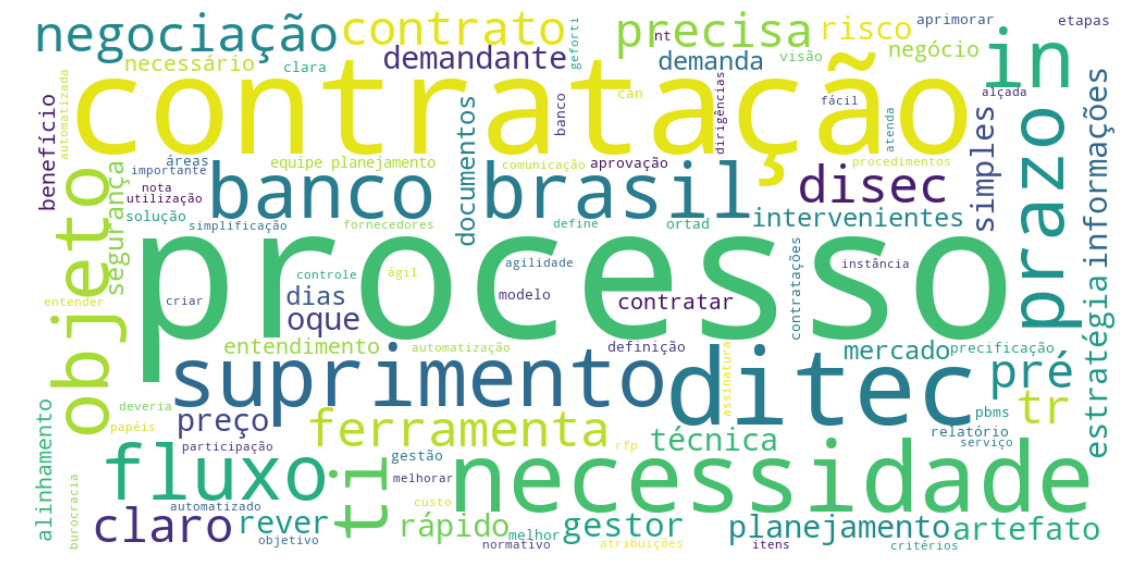

In [49]:
#plt.title("Word cloud", fontsize=20, color="gray", pad=35 )
plt.figure(figsize=(20,10))
plt.imshow(nuvem, interpolation="bilinear")
plt.axis("off")
plt.show()

In [113]:
nuvem.to_file('C:/Developer/img_ml/wordcloudDT.png')#salvando a imagem

In [50]:
texto_final.count('processo')

50

In [98]:
nuvem.to_file('C:/Users/f7098849/Documents/Cursos/nuvem.png')#salvando a img

<h3>Nuvem - Sonhos</h3>

In [51]:
#transformando o xls em txt
len(df['Registro'])#285
texto_sonhos = ''

df['Registro'] = df['Registro'].str.lower()#transformando em minúsculo

for x in range(0,len(df['Registro'])):
    if df['Rótulo'][x]=='Sonhos':
        texto_sonhos += df['Registro'][x]+'\n'
    

In [52]:
print(texto_sonhos[:10])

melhor pla


In [53]:
texto_sonhos.count('simples')

6

In [54]:
nuvem_sonhos = WordCloud(max_words=100,
                 background_color='white',
                 #colormap=mapa_cores,
                 stopwords=stopword_list,
                 height=500,
                 width=1000).generate_from_text(texto_sonhos)

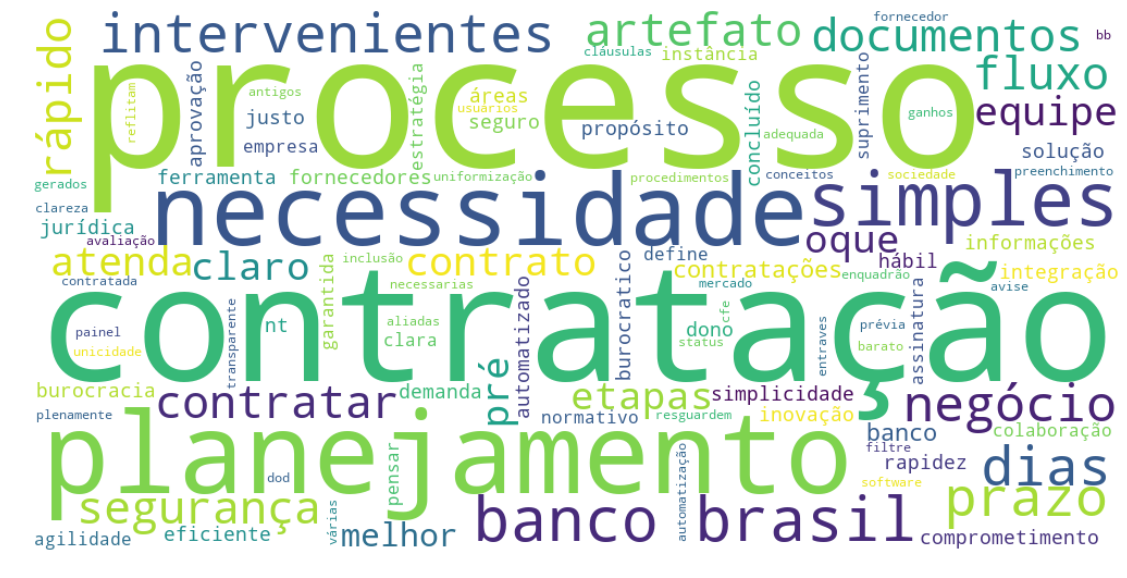

In [55]:
#plt.title("Sonhos", fontsize=20, color="gray", pad=35 )
plt.figure(figsize=(20,10))
plt.imshow(nuvem_sonhos, interpolation="bilinear")
plt.axis("off")
plt.show()

In [128]:
nuvem_sonhos.to_file('C:/Developer/img_ml/wordcloudDTsonhos.png')#salvando a imagem

<h3>Nuvem - Insights</h3>

In [56]:
#transformando o xls em txt
len(df['Registro'])#285
texto_insights = ''

df['Registro'] = df['Registro'].str.lower()#transformando em minúsculo

for x in range(0,len(df['Registro'])):
    if df['Rótulo'][x]=='Insights':
        texto_insights += df['Registro'][x]+'\n'

In [57]:
print(texto_insights[:10])

excesso de


In [58]:
nuvem_insights = WordCloud(max_words=100,
                 background_color='white',
                 #colormap=mapa_cores,
                 stopwords=stopword_list,
                 height=500,
                 width=1000).generate_from_text(texto_insights)

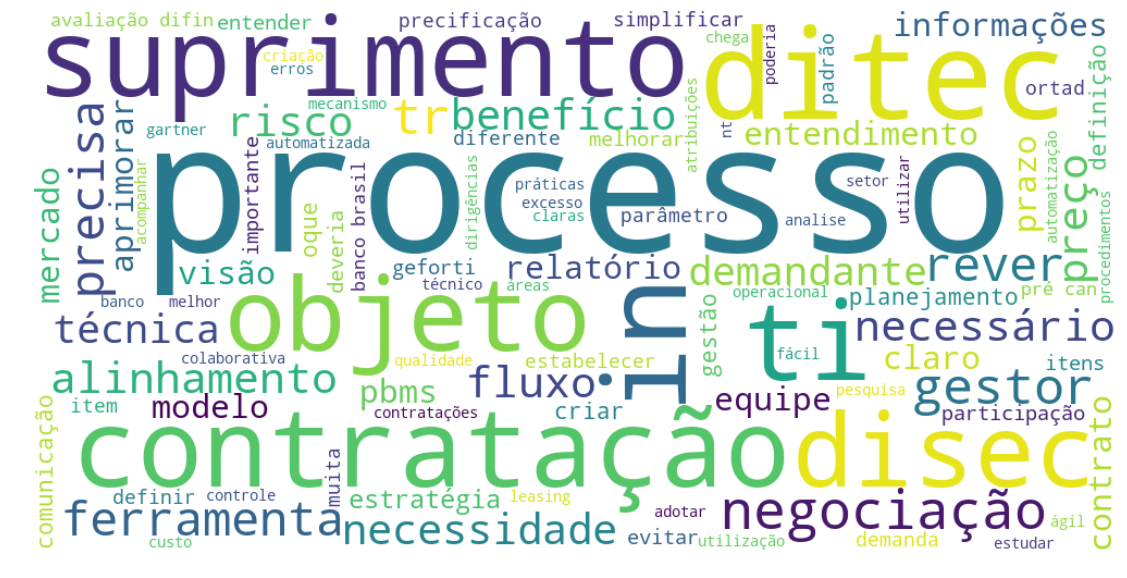

In [59]:
#plt.title("Sonhos", fontsize=20, color="gray", pad=35 )
plt.figure(figsize=(20,10))
plt.imshow(nuvem_insights, interpolation="bilinear")
plt.axis("off")
plt.show()

In [142]:
nuvem_insights.to_file('C:/Developer/img_ml/wordcloudDTinsights.png')#salvando a imagem

<h3>N-grams SONHOS</h3>

In [60]:
sonhos_list = texto_sonhos.split('\n')

Counter(sonhos_list)

Counter({'melhor planejamento e contratações que reflitam as necessidades do banco.': 1,
         'mais comprometimento dos intervenientes.': 1,
         'uniformização das informações necessarias ao preenchimento dos documentos e dos procedimentos.': 1,
         'automatização do processo.': 1,
         'rapidez.': 1,
         'unicidade de conceitos (software?).': 1,
         'fluxo sem entraves .': 1,
         'bb-bom e barato.': 1,
         'que atenda plenamente a necessidade do banco.': 1,
         'com cláusulas do contrato que resguardem o banco do brasil.': 1,
         'rapidez e simplicidade aliadas a segurança jurídica.': 1,
         'que tenha a inclusão de documentos pelo fornecedor.': 1,
         'que tenha um painel que avise dos status dos novos e antigos .': 1,
         'que filtre os fornecedores que não se enquadrão para a contratação.': 1,
         'equipe planejamento com várias áreas (dod).': 1,
         'etapas cfe solução contratada.': 1,
         'clareza do "d

In [61]:
sonhos_list[0]

'melhor planejamento e contratações que reflitam as necessidades do banco.'

<h3>Palavras mais comuns dentro das sentenças de palavras mais comuns da nuvem de SONHOS</h3>

In [78]:
word_find = 'contrataç'
lista_word_find = []
for x in sonhos_list:
    if word_find in x:
        lista_word_find.append(x)

In [79]:
type(lista_word_find)

list

In [80]:
len(lista_word_find)

17

In [81]:
lista_word_find

['melhor planejamento e contratações que reflitam as necessidades do banco.',
 'que filtre os fornecedores que não se enquadrão para a contratação.',
 'simplificação do processo de contratação.',
 'documentos-artefatos da contratação-mais simples com informações necessárias.',
 'prazos rápidos para o processo de contratação.',
 'processo " pré-contratação" concluído no prazo.',
 'contratações em tem hábil.',
 'comprometimento de  todos para a contratação.',
 'contratação que atenda o time to market ( oportunidade ).',
 'contratação com exigência mínima de artefatos.',
 'contratação com flexibilidade para descontratação, quando do interesse do banco do brasil.',
 'suprimento define quanto custou, forma de contratação.',
 'diminuição de prazos. exemplo: rfp-contratação.',
 'automatizar todo o processo de contratação- fim a fim.',
 'maior flexibilização da contratação direta com os fabricantes.',
 'todo o processo de contratação em 30 dias.',
 'contratação em tempo hábil.']

Transformando a lista em uma string

In [82]:
texto = ''
for x in range(0,len(lista_word_find)):
    lista_word_find[x] = re.sub('[^\w\s]', ' ', lista_word_find[x])#removendo pontuação
    lista_word_find[x] = normalize('NFKD', lista_word_find[x]).encode('ASCII', 'ignore').decode('ASCII')#removendo acentos
    texto += lista_word_find[x]+' '
    #print(lista_word_find[x])

In [83]:
texto

'melhor planejamento e contratacoes que reflitam as necessidades do banco  que filtre os fornecedores que nao se enquadrao para a contratacao  simplificacao do processo de contratacao  documentos artefatos da contratacao mais simples com informacoes necessarias  prazos rapidos para o processo de contratacao  processo   pre contratacao  concluido no prazo  contratacoes em tem habil  comprometimento de  todos para a contratacao  contratacao que atenda o time to market   oportunidade    contratacao com exigencia minima de artefatos  contratacao com flexibilidade para descontratacao  quando do interesse do banco do brasil  suprimento define quanto custou  forma de contratacao  diminuicao de prazos  exemplo  rfp contratacao  automatizar todo o processo de contratacao  fim a fim  maior flexibilizacao da contratacao direta com os fabricantes  todo o processo de contratacao em 30 dias  contratacao em tempo habil  '

Stemming

In [84]:
stemmer = nltk.stem.RSLPStemmer()

In [85]:
#remover stopwords
lista_texto = []
for x in texto.split():
    if x not in stopword_list_sem_acentos:#retirando stopwords
        #y = re.sub('[\W]', '', x)
        lista_texto.append(stemmer.stem(x))#fazendo o stemming

In [86]:
#palavras mais comuns
palavras_comuns = Counter(lista_texto).most_common
palavras_comuns

<bound method Counter.most_common of Counter({'contrataca': 15, 'process': 5, 'praz': 3, 'contrataco': 2, 'necess': 2, 'banc': 2, 'artefat': 2, 'havel': 2, 'melhor': 1, 'planej': 1, 'reflit': 1, 'filtr': 1, 'fornec': 1, 'enquadra': 1, 'simplificaca': 1, 'document': 1, 'simpl': 1, 'informaco': 1, 'rap': 1, 'pre': 1, 'conclu': 1, 'compromet': 1, 'atend': 1, 'tim': 1, 'to': 1, 'market': 1, 'oportun': 1, 'exigenc': 1, 'min': 1, 'flexibil': 1, 'descontrataca': 1, 'inter': 1, 'brasil': 1, 'supr': 1, 'defin': 1, 'cust': 1, 'diminuica': 1, 'rfp': 1, 'automa': 1, 'flexibilizaca': 1, 'diret': 1, 'fabric': 1, '30': 1, 'dia': 1})>

In [87]:
#len(sonhos_list)
type(sonhos_list)

list

In [88]:
#criar a lista de sentenças
#add os tokens de início e fim de sentença - bigramas
words=[]
for x in range(0,len(sonhos_list)):
    inicio = sonhos_list[x]
    fim = '<s> '+'<s> '+sonhos_list[x]+' </s>'
    words.append(fim)

In [89]:
words[0]

'<s> <s> melhor planejamento e contratações que reflitam as necessidades do banco. </s>'

In [268]:
#transformar a lista de sentença em lista de palavras
'''
words_split=[]
for x in range(0,len(words)):
    lista=[]
    lista = words[x].split()
    words_split.append(lista)

'''

In [90]:
#transformar a lista de sentença em lista de palavras
words_split=[]
lista_word_sonhos=[]
for x in range(0,len(words)):
    lista_word_sonhos.extend(words[x].split())
    #words_split.append(lista) 

In [91]:
len(lista_word_sonhos)#esse número não é o real, pois alguns caracteres especiais estão constando como palavras

1231

In [92]:
lista_words_sonhos_sem_stop = set(lista_word_sonhos+stopword_list)#pode-se utilizar a lista de stop sem acentos 

In [93]:
len(lista_words_sonhos_sem_stop)

926

In [94]:
Counter(lista_words_sonhos_sem_stop).most_common(30)

[('viabilizadora', 1),
 ('direita', 1),
 ('menos', 1),
 ('nunca', 1),
 ('próprias', 1),
 ('estás', 1),
 ('hora', 1),
 ('utilização', 1),
 ('estivera', 1),
 ('ontem', 1),
 ('vai', 1),
 ('algumas', 1),
 ('áreas', 1),
 ('sistema', 1),
 ('partir', 1),
 ('burocratico,', 1),
 ('brasil', 1),
 ('música', 1),
 ('fácil.', 1),
 ('inovação', 1),
 ('filtre', 1),
 ('objetivo.', 1),
 ('estiveram', 1),
 ('quanto', 1),
 ('assinatura', 1),
 ('teus', 1),
 ('justo', 1),
 ('cujos', 1),
 ('entre', 1),
 ('fostes', 1)]

In [95]:
#words_split[0:20]
lista_words_sonhos_sem_stop

{'!.',
 '"',
 '"dono".',
 '(',
 '(custo).',
 '(dod).',
 '(e',
 '(quantidade)',
 '(software?).',
 '(todos',
 ').',
 '->',
 '.',
 '1',
 '100%',
 '15',
 '30',
 '5',
 '6',
 '60',
 '</s>',
 '<s>',
 '=',
 'a',
 'acabar',
 'acabe',
 'acerca',
 'achomêtro".',
 'acontecer',
 'acusação,',
 'adaptar',
 'adequada.',
 'adequadamente',
 'adequado.',
 'adeus',
 'agilidade',
 'agora',
 'ainda',
 'ajudem',
 'alem',
 'algmas',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'aliadas',
 'alçada',
 'além',
 'ambas',
 'ambos',
 'amplo.',
 'ano',
 'anos',
 'antes',
 'antigos',
 'ao',
 'aonde',
 'aos',
 'apenas',
 'apoio',
 'apontar',
 'apos',
 'aprovação',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'aquisições',
 'arrependimentos.',
 'artefato.',
 'artefatos',
 'artefatos.',
 'as',
 'assim',
 'assim,',
 'assinada',
 'assinatura',
 'assinaturar',
 'assinaturas',
 'atenda',
 'atendam',
 'atividades',
 'atrapalhem.',
 'através',
 'atribuições',
 'atrás',
 'atual',
 'até',
 'auditado',

<h3>Gerar os bigramas e trigramas com nltk.util DOS SONHOS</h3>

In [80]:
#words_split[0]

In [109]:
words_sonhos_bigram = bigrams(lista_word_sonhos)
words_sonhos_trigram = trigrams(lista_word_sonhos)

In [110]:
words_sonhos_bigram

<generator object bigrams at 0x00000204E87D0A98>

In [111]:
type(words_sonhos_bigram)

generator

In [112]:
#contar os bigramas
count_sonhos_bigram = Counter(words_sonhos_bigram)
count_sonhos_bigram

Counter({('<s>', '<s>'): 136,
         ('<s>', 'melhor'): 1,
         ('melhor', 'planejamento'): 2,
         ('planejamento', 'e'): 1,
         ('e', 'contratações'): 1,
         ('contratações', 'que'): 1,
         ('que', 'reflitam'): 1,
         ('reflitam', 'as'): 1,
         ('as', 'necessidades'): 1,
         ('necessidades', 'do'): 1,
         ('do', 'banco.'): 2,
         ('banco.', '</s>'): 2,
         ('</s>', '<s>'): 135,
         ('<s>', 'mais'): 3,
         ('mais', 'comprometimento'): 1,
         ('comprometimento', 'dos'): 1,
         ('dos', 'intervenientes.'): 2,
         ('intervenientes.', '</s>'): 3,
         ('<s>', 'uniformização'): 1,
         ('uniformização', 'das'): 1,
         ('das', 'informações'): 1,
         ('informações', 'necessarias'): 1,
         ('necessarias', 'ao'): 1,
         ('ao', 'preenchimento'): 1,
         ('preenchimento', 'dos'): 1,
         ('dos', 'documentos'): 1,
         ('documentos', 'e'): 1,
         ('e', 'dos'): 1,
         ('

In [113]:
Counter(count_sonhos_bigram).most_common(20)

[(('<s>', '<s>'), 136),
 (('</s>', '<s>'), 135),
 (('<s>', 'onde'), 12),
 (('<s>', 'que'), 11),
 (('.', '</s>'), 8),
 (('<s>', 'menos'), 8),
 (('<s>', 'processo'), 7),
 (('banco', 'do'), 6),
 (('processo', 'de'), 6),
 (('contratação.', '</s>'), 5),
 (('dias.', '</s>'), 5),
 (('<s>', 'fluxo'), 4),
 (('<s>', 'com'), 4),
 (('do', 'brasil.'), 4),
 (('brasil.', '</s>'), 4),
 (('que', 'tenha'), 4),
 ((').', '</s>'), 4),
 (('de', 'forma'), 4),
 (('<s>', 'contratar'), 4),
 (('<s>', 'contratação'), 4)]

In [114]:
#contar os trigramas
count_sonhos_trigram = Counter(words_sonhos_trigram)
count_sonhos_trigram

Counter({('<s>', '<s>', 'melhor'): 1,
         ('<s>', 'melhor', 'planejamento'): 1,
         ('melhor', 'planejamento', 'e'): 1,
         ('planejamento', 'e', 'contratações'): 1,
         ('e', 'contratações', 'que'): 1,
         ('contratações', 'que', 'reflitam'): 1,
         ('que', 'reflitam', 'as'): 1,
         ('reflitam', 'as', 'necessidades'): 1,
         ('as', 'necessidades', 'do'): 1,
         ('necessidades', 'do', 'banco.'): 1,
         ('do', 'banco.', '</s>'): 2,
         ('banco.', '</s>', '<s>'): 2,
         ('</s>', '<s>', '<s>'): 135,
         ('<s>', '<s>', 'mais'): 3,
         ('<s>', 'mais', 'comprometimento'): 1,
         ('mais', 'comprometimento', 'dos'): 1,
         ('comprometimento', 'dos', 'intervenientes.'): 1,
         ('dos', 'intervenientes.', '</s>'): 1,
         ('intervenientes.', '</s>', '<s>'): 3,
         ('<s>', '<s>', 'uniformização'): 1,
         ('<s>', 'uniformização', 'das'): 1,
         ('uniformização', 'das', 'informações'): 1,
        

In [115]:
Counter(count_sonhos_trigram).most_common(40)

[(('</s>', '<s>', '<s>'), 135),
 (('<s>', '<s>', 'onde'), 12),
 (('<s>', '<s>', 'que'), 11),
 (('.', '</s>', '<s>'), 8),
 (('<s>', '<s>', 'menos'), 8),
 (('<s>', '<s>', 'processo'), 7),
 (('contratação.', '</s>', '<s>'), 5),
 (('dias.', '</s>', '<s>'), 5),
 (('<s>', '<s>', 'fluxo'), 4),
 (('<s>', '<s>', 'com'), 4),
 (('banco', 'do', 'brasil.'), 4),
 (('do', 'brasil.', '</s>'), 4),
 (('brasil.', '</s>', '<s>'), 4),
 (('<s>', 'que', 'tenha'), 4),
 ((').', '</s>', '<s>'), 4),
 (('<s>', '<s>', 'contratar'), 4),
 (('<s>', '<s>', 'contratação'), 4),
 (('<s>', 'onde', 'a'), 4),
 (('<s>', 'onde', 'o'), 4),
 (('<s>', '<s>', 'mais'), 3),
 (('intervenientes.', '</s>', '<s>'), 3),
 (('processo.', '</s>', '<s>'), 3),
 (('o', 'banco', 'do'), 3),
 (('<s>', 'que', 'seja'), 3),
 (('de', 'contratação.', '</s>'), 3),
 (('o', 'processo', 'de'), 3),
 (('rápido.', '</s>', '<s>'), 3),
 (('<s>', '<s>', 'maior'), 3),
 (('simples.', '</s>', '<s>'), 3),
 (('do', 'banco.', '</s>'), 2),
 (('banco.', '</s>', '<s>')

<h2>Criar lista de bigramas e trigramas únicos</h2>

In [116]:
bigram_key_sonhos = list(count_sonhos_bigram.keys())
trigram_key_sonhos = list(count_sonhos_trigram.keys())

In [117]:
trigram_key_sonhos

[('<s>', '<s>', 'melhor'),
 ('<s>', 'melhor', 'planejamento'),
 ('melhor', 'planejamento', 'e'),
 ('planejamento', 'e', 'contratações'),
 ('e', 'contratações', 'que'),
 ('contratações', 'que', 'reflitam'),
 ('que', 'reflitam', 'as'),
 ('reflitam', 'as', 'necessidades'),
 ('as', 'necessidades', 'do'),
 ('necessidades', 'do', 'banco.'),
 ('do', 'banco.', '</s>'),
 ('banco.', '</s>', '<s>'),
 ('</s>', '<s>', '<s>'),
 ('<s>', '<s>', 'mais'),
 ('<s>', 'mais', 'comprometimento'),
 ('mais', 'comprometimento', 'dos'),
 ('comprometimento', 'dos', 'intervenientes.'),
 ('dos', 'intervenientes.', '</s>'),
 ('intervenientes.', '</s>', '<s>'),
 ('<s>', '<s>', 'uniformização'),
 ('<s>', 'uniformização', 'das'),
 ('uniformização', 'das', 'informações'),
 ('das', 'informações', 'necessarias'),
 ('informações', 'necessarias', 'ao'),
 ('necessarias', 'ao', 'preenchimento'),
 ('ao', 'preenchimento', 'dos'),
 ('preenchimento', 'dos', 'documentos'),
 ('dos', 'documentos', 'e'),
 ('documentos', 'e', 'dos'),


<h3>Cálculo da frequência relativa de trigramas</h3>

In [118]:
list_bigram_sonhos = []
list_lastword_sonhos = []
list_probs_sonhos = []

for t in trigram_key_sonhos:
    key_bigram = (t[0], t[1])
    prob = count_sonhos_trigram[t] / count_sonhos_bigram[key_bigram]
    list_bigram_sonhos.append(key_bigram)
    list_lastword_sonhos.append(t[2])
    list_probs_sonhos.append(prob)

<h3>Criando um DataFrame</h3>

In [119]:
model_df_sonhos = pd.DataFrame({'bigram': list_bigram_sonhos, 'lastword': list_lastword_sonhos, 'prob': list_probs_sonhos})
model_df_sonhos

,bigram,lastword,prob
0,"(<s>, <s>)",melhor,0.007353
1,"(<s>, melhor)",planejamento,1.000000
2,"(melhor, planejamento)",e,0.500000
3,"(planejamento, e)",contratações,1.000000
4,"(e, contratações)",que,1.000000
5,"(contratações, que)",reflitam,1.000000
6,"(que, reflitam)",as,1.000000
7,"(reflitam, as)",necessidades,1.000000
8,"(as, necessidades)",do,1.000000
9,"(necessidades, do)",banco.,1.000000


In [120]:
bigram_df_sonhos = model_df_sonhos.loc[model_df_sonhos['bigram'] == ('automatização','do')]
print(bigram_df_sonhos)

                 bigram   lastword  prob
34  (automatização, do)  processo.   1.0


In [121]:
calc_prob = sum(bigram_df_sonhos['prob'])
calc_prob

1.0

In [122]:
lastword_view= model_df_sonhos.loc[model_df_sonhos['lastword'] == ('processo')]
lastword_view

,bigram,lastword,prob
187,"(simplificação, do)",processo,1.000000
203,"(<s>, <s>)",processo,0.051471
258,"(para, o)",processo,0.500000
599,"(prazo, do)",processo,1.000000
602,"(interno, =)",processo,1.000000
786,"(todo, o)",processo,1.000000
936,"(clara, do)",processo,1.000000


In [124]:
num_sents = 50
current_bigram = ('<s>', '<s>')
i = 0
while i < num_sents:
    df = model_df_sonhos.loc[model_df_sonhos['bigram'] == current_bigram]
    words = df['lastword'].values
    probs = df['prob'].values
    last_word = random.choices(words, probs)[0]
    
    current_bigram = (current_bigram[1], last_word)
    
    if last_word == '</s>':
        i+=1
    
    if last_word != '<s>' and last_word != '</s>':
        print(last_word, end=' ')

normativo claro e objetivo. onde se possa adaptar à necessidade atual do negócio. atividades realizadas de forma simultâneas quando possível . simplicade. agilidade para fechar o contrato em 1 sprint. assinatura digital (todos os membros). processo seguro e correto para todos. simplicade. coleta de assinaturar em uma semana em qualquer instância decisória. que seja nosso processo. planejamento interativos-livre de dirigências. onde a vontade de mudar esteja clara nos indicadores. que comece e acabe antes de tocar qualquer música da celine dion. suprimento define quanto custou, forma de contratação. processo auditado na sua elaboração ( segurança jurídica e técnica). acabar com o nts- deliberação automatizada. comprometimento de todos para a contratação. simples. diminuição de prazos. exemplo: rfp-contratação. clareza do "dono". mais eficácia, menos explicácia. todo o processo de contratação. definição clara do processo e do papel dos intervenientes. planejamento interativos-livre de di

<h2>Análise Insigths</h2>

In [125]:
insigths_list = texto_insights.split('\n')

Counter(insigths_list)

Counter({'excesso de informações desnecessárias dificultam o entendimento do objeto.': 1,
         'rever modelo de atuação e avaliação da difin.': 1,
         'necessário estudar os contratos de objeto similar para padronizar as especificações ( nase, requisitos, suporte).': 1,
         'aprimorar simulador de cenáriso em tempo de planejamento das contratações ( vpl, payback...).': 1,
         'para que serve a avaliação da difin? valor agregado? importância para o processo? .': 1,
         'exploração mais o gartner para insumos de preço, formas de contratação e  referências de mercado.': 1,
         'leasing/saas e outros: banco do brasil precisa rever modelo de eficiência operacional.': 1,
         'exigir part number* nas propostas e nos contratos. *numero pradronizado de identificação de produtos.': 1,
         'alinhamento entre os comites/ comissões da ditec.': 1,
         'deve-se ter instruções claras sobre como preencher o tr.': 1,
         'falta comunicação entre as áreas 

<h3>Palavras mais comuns dentro das sentenças de palavras mais comuns da nuvem de INSIGTHS</h3>

In [126]:
word_find_insigths = 'negociação'
lista_word_find_insigths = []
for x in insigths_list:
    if word_find_insigths in x:
        lista_word_find_insigths.append(x)

In [127]:
len(lista_word_find_insigths)

8

In [128]:
#transformando a lista em str
texto_ins = ''
for x in range(0,len(lista_word_find_insigths)):
    lista_word_find_insigths[x] = re.sub('[^\w\s]', ' ', lista_word_find_insigths[x])#removendo pontuação
    lista_word_find_insigths[x] = normalize('NFKD', lista_word_find_insigths[x]).encode('ASCII', 'ignore').decode('ASCII')#removendo acentos
    texto_ins += lista_word_find_insigths[x]+' '
    #print(lista_word_find[x])

In [129]:
texto_ins

'uma area de negociacao traz visao sem vicios   conversar com o demandante e acordar parametros de negociacao  rever procedimentos de negociacao   primeiro manda email  que ja pode ser aceita    participacao do demandante na negociacao para a contratacao direta  estudar viabilidade de maior utilizacao do apoio do gartner na negociacao com fornecedores  ter mais prazo para negociacao  as vezes chega em cima da hora  a area de negociacao nao sente que e responsavel pelo valor final  ja que o parametro vem da geforti  negociacao com a bbts e dificil   '

In [130]:
#remover stopwords
lista_texto_ins = []
for x in texto_ins.split():
    if x not in stopword_list_sem_acentos:#retirando stopwords
        #y = re.sub('[\W]', '', x)
        lista_texto_ins.append(stemmer.stem(x))#fazendo o stemming

In [131]:
palavras_comuns_ins = Counter(lista_texto_ins).most_common
palavras_comuns_ins

<bound method Counter.most_common of Counter({'negociaca': 8, 'demand': 2, 'parametr': 2, 'traz': 1, 'visa': 1, 'vici': 1, 'convers': 1, 'acord': 1, 'rev': 1, 'proced': 1, 'mand': 1, 'email': 1, 'aceit': 1, 'participaca': 1, 'contrataca': 1, 'diret': 1, 'estud': 1, 'viabil': 1, 'utilizaca': 1, 'gartn': 1, 'fornec': 1, 'praz': 1, 'cheg': 1, 'sent': 1, 'responsa': 1, 'gefort': 1, 'bbt': 1, 'dificil': 1})>

<h2>Conclusão</h2>

<p>O modelo, além de gerar nuvem de palavras, consegue minimamente identificar a relação das palavras com outras palavras.
</p>
<p>Pode ser utilizado em situações que se precise sintetizar um grande número de palavras ou expressões, observando-se as mais frequentes.
</p>
<p>O modelo, se adaptado, pode-se servir para geração de novas ideias a partir da base de dados.
</p>
